
## Titanic Survival Predictions
In this dataset, you will train a logistic regression model that can predict the survivors based on a set of features about the passenger. Start first by taking sometime to understand your data. You can find more info about the data and its breakdown in this link https://www.kaggle.com/c/titanic/data

### Start with Data Exploring
Your data is split into two files. One for training and one for testing. Load both and find out the number of samples and features in each file

In [1]:
import pandas as pd
train_data = pd.read_csv("C:/Users/HP/Downloads/train.csv")         
test_data = pd.read_csv("C:/Users/HP/Downloads/test.csv")
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
train_samples, train_features = train_data.shape
test_samples, test_features = test_data.shape
print("Total number of samples and features in train data are",train_samples,"&",train_features)
print("Total number of samples and features in test data are",test_samples,"&",test_features)

Total number of samples and features in train data are 891 & 12
Total number of samples and features in test data are 418 & 11


In [3]:
train_data.head()   #Printing first 5 rows of train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.describe()   #Summary Statistics

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


How many survivors in the traning set?

In [5]:
survived = 0
for i in train_data.Survived:           #Running a loop to see number of survivors
    if i==1:
        survived+=1
print("The number of survivors in training data are",survived)

The number of survivors in training data are 342


Can you find Jack and Rose in the data? Use a code. You probably won't find them as they were fictional charachter. See if you can find Beatrice Irene Sandstorm? Read here about her https://www.encyclopedia-titanica.org/titanic-survivor/beatrice-irene-sandstrom.html

In [6]:
name_info = train_data[train_data['Name'].str.contains("Sandstrom")]        
name_info

name_info1 = test_data[test_data['Name'].str.contains("Sandstrom")]
name_info1

# The information about Beatrice Irene Sandstorm is present in the test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7,G6,S


### Does features make difference?
In the training dataset (file)
- Pclass - Usually, higher class (class 1) meant a more expensive fare and the other classes paid lesser to be on the ship. What was the survival rate per class?
- Sex — What was the survival rate of women?
- SibSp — What was the survival rate based on number of siblings the passenger had on the ship?
- Parch — What was the survival rate based on number of parents/children the passenger had on the ship?

In [7]:
survival_rate_per_class = train_data.groupby('Pclass')['Survived'].mean()
survival_rate_of_women = train_data[train_data['Sex']=='female']['Survived'].mean()
survival_rate_siblings = train_data.groupby('SibSp')['Survived'].mean()
survival_rate_parents = train_data.groupby('Parch')['Survived'].mean()
print("survival rate per class is \n",survival_rate_per_class)
print("survival rate of women is\n ",survival_rate_of_women)
print("survival rate based on number of siblings the passenger had on the ship is\n ",survival_rate_siblings)
print("survival rate based on number of parents/children the passenger had on the ship\n?",survival_rate_parents)

survival rate per class is 
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
survival rate of women is
  0.7420382165605095
survival rate based on number of siblings the passenger had on the ship is
  SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
survival rate based on number of parents/children the passenger had on the ship
? Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


Plot two histogram based on the age. One for the survivors and other for non survivors. According to the histogram was Jack more likely to survive or not survive and why?

Text(0, 0.5, 'Number of Survivors')

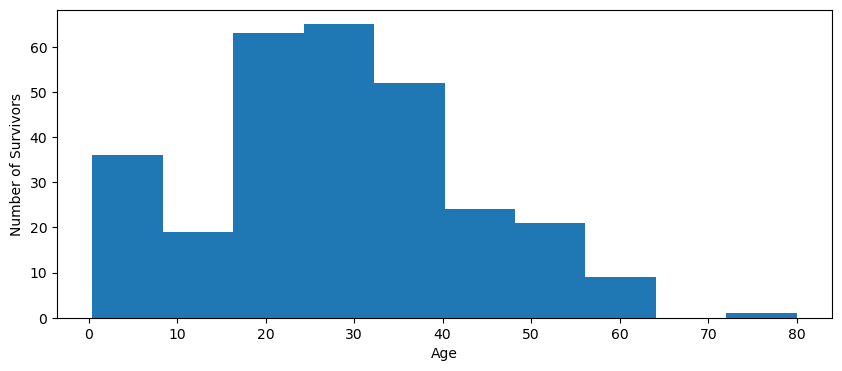

In [8]:
import matplotlib.pyplot as plt
survivors = train_data[train_data['Survived']==1]
not_survivors = train_data[train_data['Survived']==0]
plt.figure(figsize=(10,4))
plt.hist(survivors['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Survivors')


Text(0, 0.5, 'Number of Survivors')

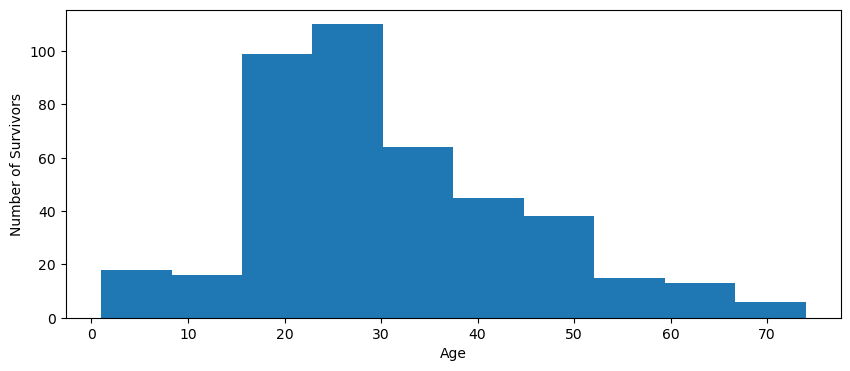

In [9]:
plt.figure(figsize=(10,4))
plt.hist(not_survivors['Age'])
plt.xlabel('Age')
plt.ylabel('Number of Survivors')

In [10]:
print("According to the histogram chances of jack surviving are high but because of rose he died")

According to the histogram chances of jack surviving are high but because of rose he died


Divide the age histograms on a 3 X 2 subplots. Left column is for non survival data and the right one is for survivors. Each row is for one of the three PClasses

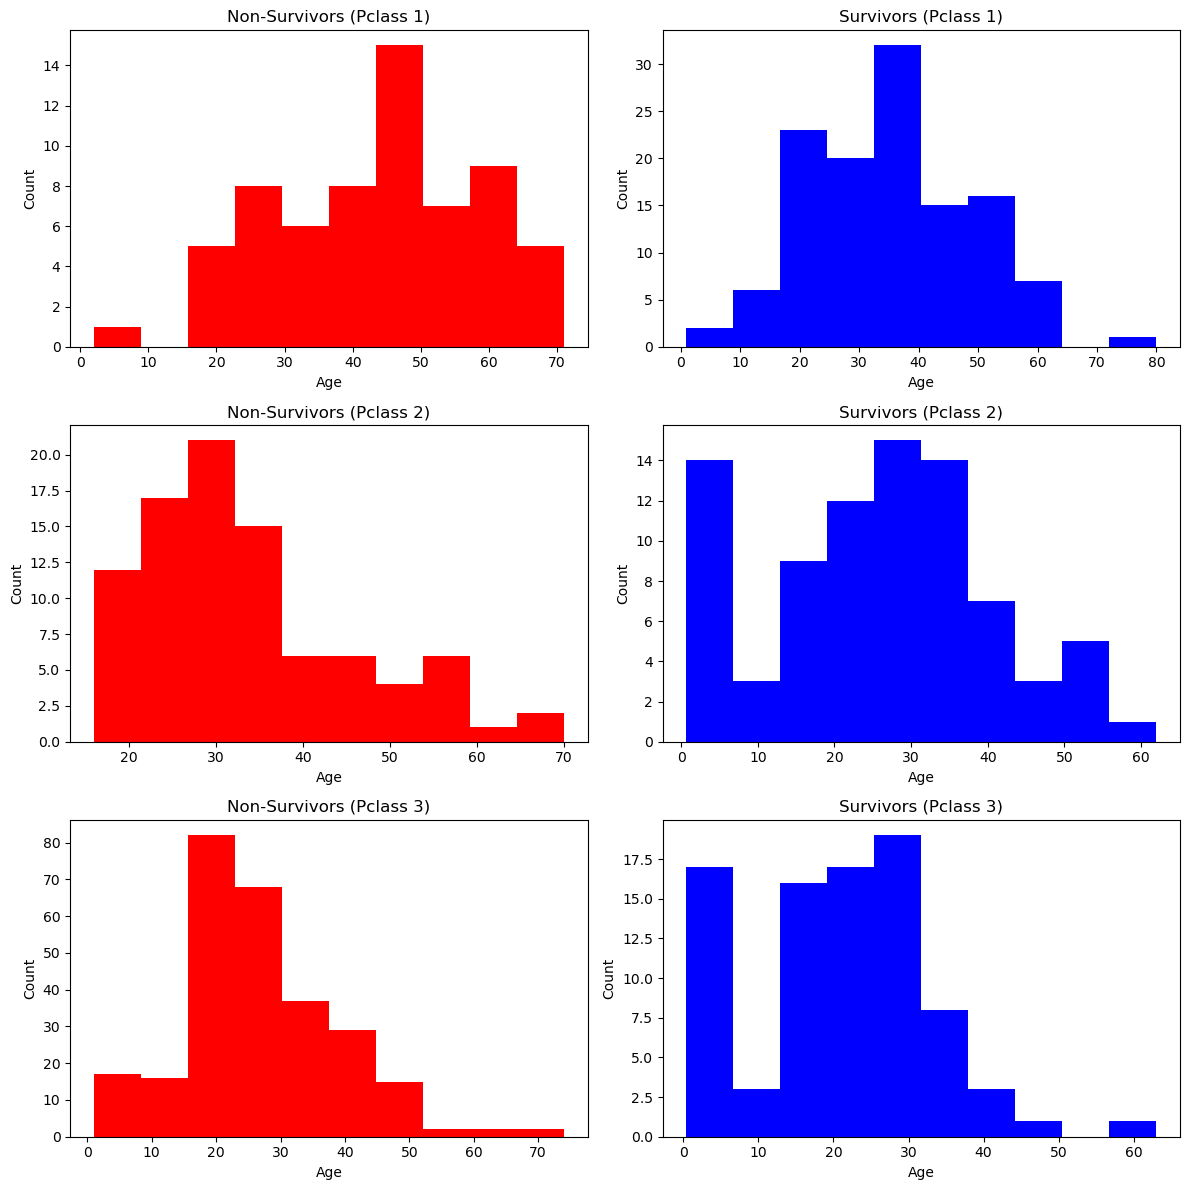

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for pclass, group in train_data.groupby('Pclass'): # Running a loop on passenger class
    row = pclass - 1   #calculating row index for subplot
    survivors = group[group['Survived'] == 1]
    not_survivors = group[group['Survived'] == 0]
    axes[row, 0].hist(not_survivors['Age'], color='red' ) #plotting histogram for non survivors in left
    axes[row, 0].set_title(f'Non-Survivors (Pclass {pclass})')
    axes[row, 0].set_xlabel('Age')
    axes[row, 0].set_ylabel('Count')

    axes[row, 1].hist(survivors['Age'], color='blue')
    axes[row, 1].set_title(f'Survivors (Pclass {pclass})')
    axes[row, 1].set_xlabel('Age')
    axes[row, 1].set_ylabel('Count')
    
plt.tight_layout()
plt.show()

## Fix missing Data in the Training Dataset
Which features in the training contains missing values? and how many missing values are there?

In [12]:
missing_values = train_data.isnull().sum()
missing_values = missing_values[missing_values >0]
print("features with missing values are\n",missing_values)

features with missing values are
 Age         177
Cabin       687
Embarked      2
dtype: int64


Find out the age median grouped by PClass and gender. Clean up the data by substituting the nans by the median from the corresponding PClass and gender

In [13]:
age_median_by_group = train_data.groupby(['Pclass', 'Sex'])['Age'].median()

for (pclass, sex), age_median in age_median_by_group.items():
    train_data.loc[(train_data['Pclass'] == pclass) & (train_data['Sex'] == sex) & (train_data['Age'].isnull()), 'Age'] = age_median
    
    
    # Another way to directly fill the missing values using Simple Imputer
#from sklearn.impute import SimpleImputer
#fill_values = SimpleImputer(strategy="median")
#train_data['Age'] = fill_values.fit_transform(train_data[['Age']])

For the Embarked column, substitute the missing value with the highest occurance value among the entire dataset

In [14]:
mode = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(mode, inplace=True)

# Let's do our Model
Cabin, Name, ticket and Passenger Id are not important to our ML model. Let's get rid of them

In [15]:
cleaned_data = train_data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

Make sure now that your data does not have any nulls

In [16]:
missing_values = cleaned_data.isnull().sum()
missing_values = missing_values[missing_values >0]
print("features with missing values are\n",missing_values)


features with missing values are
 Series([], dtype: int64)


We need to convert some of our features to categories and numbers instead of letters as logistic regression model won't be able to decode them. Map the embarked variable into 0,1, and 2 and the sex variable into 0 and 1

% hint: `df_train['Embarked'].astype('category').cat.codes`

In [17]:
cleaned_data['Embarked'] = cleaned_data['Embarked'].astype('category').cat.codes
cleaned_data['Sex'] = cleaned_data['Sex'].astype('category').cat.codes

You are now ready to build a logistic regression model and fit it. You do not to split your data since I have already splitted for you in 2 different files so use all the training

In [18]:
cleaned_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
x_train = cleaned_data.drop(columns=['Survived'])
y_train = cleaned_data['Survived']
logreg.fit(x_train, y_train)

LogisticRegression()

Show the training score. 

In [20]:
train_score = logreg.score(x_train, y_train)
print('Training accuracy is ', train_score)

Training accuracy is  0.8092031425364759


What are the coefficients. Make a plot that shows the importance of each feature in your model

In [21]:
coefficients = logreg.coef_
print('coeffs are ', logreg.coef_)

coeffs are  [[-1.15301519e+00 -2.60440451e+00 -4.27681361e-02 -3.37290444e-01
  -8.00019949e-02  1.93074883e-03 -1.93603343e-01]]


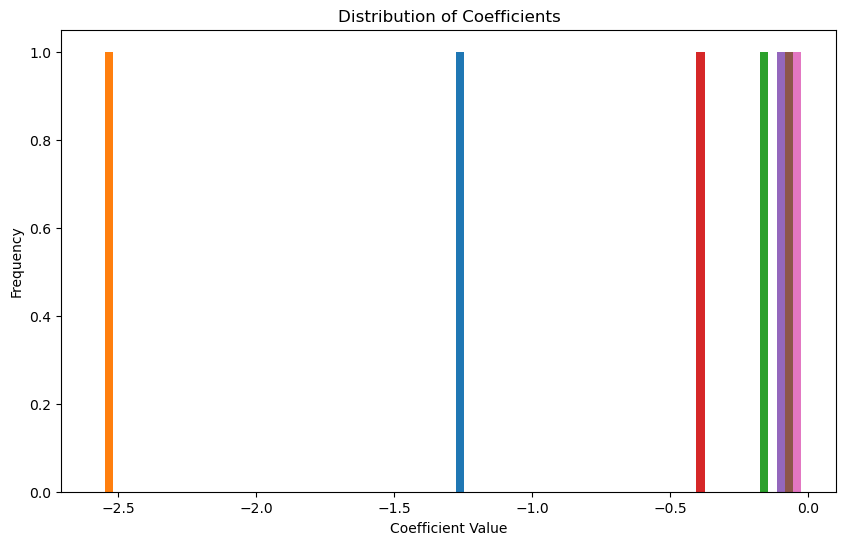

In [22]:
feature_names = x_train.columns
plt.figure(figsize=(10, 6))
plt.hist(coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Distribution of Coefficients')
plt.show()

Use the logistic regression model on the test data to predict who will survive. You may need to do same cleaning you have done in the training data to the test data

How many will survive from the test dataset?

In [23]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
missing_values_test = test_data.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("Features with missing values in test data are\n", missing_values_test)


Features with missing values in test data are
 Age       86
Fare       1
Cabin    327
dtype: int64


In [25]:
age_median_by_group = test_data.groupby(['Pclass', 'Sex'])['Age'].median()

for (pclass, sex), age_median in age_median_by_group.items():
    test_data.loc[(test_data['Pclass'] == pclass) & (test_data['Sex'] == sex) & (test_data['Age'].isnull()), 'Age'] = age_median

In [29]:
fare_median = test_data['Fare'].median()
test_data['Fare'].fillna(fare_median, inplace=True)

In [30]:
missing_values_test = test_data.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("Features with missing values in test data are\n", missing_values_test)

Features with missing values in test data are
 Cabin    327
dtype: int64


In [31]:
test_data['Embarked'] = test_data['Embarked'].astype('category').cat.codes
test_data['Sex'] = test_data['Sex'].astype('category').cat.codes

In [32]:
cleaned_test_data = test_data.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'])

In [33]:
predictions = logreg.predict(cleaned_test_data)

print("Number of survivors from the test dataset:", sum(predictions))

Number of survivors from the test dataset: 157
